In [1]:
import pandas as pd
resin = pd.read_table('http://www.stat.umn.edu//~gary//book//fcdae.data//exmpl3.2', 
                      header=10, delim_whitespace=True)
resin.head(40)

,temp,y
0,1,2.04
1,1,1.91
2,1,2.00
3,1,1.92
4,1,1.85
5,1,1.96
6,1,1.88
7,1,1.90
8,2,1.66
9,2,1.71


In [2]:
def temp_groups(series):
    if series == 1:
        return 175
    elif series == 2:
        return 194
    elif series == 3:
        return 213
    elif series == 4:
        return 231
    elif series == 5:
        return 250

resin['tempC'] = resin['temp'].apply(temp_groups)

In [3]:
resin.describe()


,temp,y,tempC
count,37.000000,37.000000,37.000000
mean,2.864865,1.465135,210.081081
std,1.397660,0.326229,26.144235
min,1.000000,0.830000,175.000000
25%,2.000000,1.210000,194.000000
50%,3.000000,1.380000,213.000000
75%,4.000000,1.710000,231.000000
max,5.000000,2.040000,250.000000


/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/srv/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to

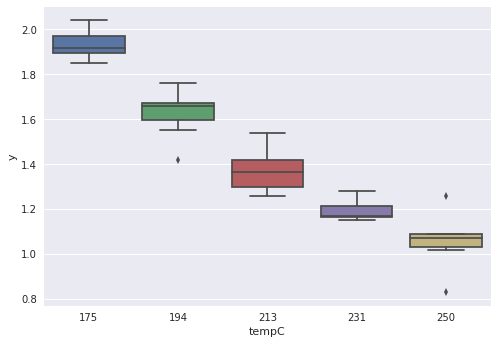

In [4]:
%matplotlib inline
import seaborn as sns
sns.boxplot(x="tempC", y="y", data=resin)

In [5]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [6]:
Model = ols('y ~ C(temp)', data=resin).fit()
table = sm.stats.anova_lm(Model, typ=2) 
print(table)


            sum_sq    df          F        PR(>F)
C(temp)   3.537632   4.0  96.362963  2.241949e-17
Residual  0.293692  32.0        NaN           NaN


In [7]:
import scipy.stats
scipy.stats.f.cdf(96.363, 4, 32)

0.9999999999999999

In [8]:
1-scipy.stats.f.cdf(96.363, 4, 32)

1.1102230246251565e-16

In [9]:
scipy.stats.f.ppf(0.9999999999999999, 4, 32)


86.38398373618752